# Data exploration

### Introduction

The first step of any analysis is to understand what we are searching for. In our analysis we aim to measure the central exclusive di-lepton production, $pp\to p\oplus \ell\ell \oplus p$ process with $\ell\in\{ e,\mu \} $. Feinman diagram of this process are shown bellow: 

<img src="img/diagrams.png" alt="Feinmann diagrams" style="width: 700px;"/>

Where in our case, we will consider only electrons and muons. 

---
The measurement using 2016 data was published in [JHEP07(2018)153](https://arxiv.org/abs/1803.04496). 

---

To understand the process better, we will explore the final state signature. We will use [uproot4](https://github.com/scikit-hep/uproot4) to read ROOT file, and [numpy](https://numpy.org/) arrays to analyze the data


In [1]:
#start with standard python imports
#!pip install --user mplhep uproot4 #enable this line if the imports fails
import numpy as np
import uproot4
import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib.colors import LogNorm

In [2]:
#to make the plots in CMS style execute this line
plt.style.use([hep.style.ROOT, hep.style.firamath])
plt.style.use(hep.style.CMS)

In [6]:
#Execute this line if running on SWAN, otherwise update the path to the data files:
#PATH='/eos/cms/store/user/jjhollar/CERNSummerStudentProject2021/'
PATH='data'
filename=PATH+'/gammagammaMuMu_FPMC_pT25_PU140_NTUPLE_1_version2.root'

## Loading the data (signal)

We will load MC file of the simulated signal events. For more info how to read ROOT files, see [this](UpROOT4_example.ipynb) notebook



In [7]:
tree = uproot4.open(filename+":myana/mytree")

Browse the names of the branches:

In [8]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
evt_size             | int32_t                  | AsDtype('>i4')
vtx_size             | int32_t                  | AsDtype('>i4')
vtx_x                | float[]                  | AsJagged(AsDtype('>f4'))
vtx_y                | float[]                  | AsJagged(AsDtype('>f4'))
vtx_z                | float[]                  | AsJagged(AsDtype('>f4'))
vtx_pt2              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_size           | int32_t                  | AsDtype('>i4')
vtx4D_x              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_y              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_z              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_t              | float[]                  | AsJagged(AsDtype('>f4'))
vtx4D_terr           | float[]             

### Making plots

In the next cell we will plot the number of protons stored for each event:

In [24]:
# read array of protons
proton_size = tree['genproton_size'].array(library="pd")

In [30]:
#convert the array to histogram with defined number of bins
bins = np.linspace(0,150,150)
data=np.histogram(proton_size, bins,density=True)

No handles with labels found to put in legend.


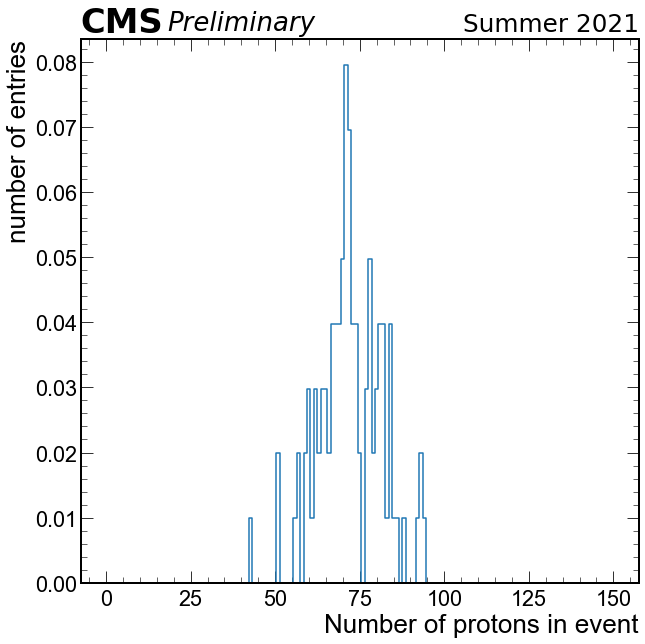

In [33]:
# plot a histogram of proton multiplicity
f, ax = plt.subplots()
hep.histplot(data, bins, ax=ax)

#add different labels to the plot and save to a file
hep.cms.label(llabel="Preliminary", rlabel="Summer 2021", ax=ax)
ax.legend(); 
ax.set(xlabel='Number of protons in event', ylabel='number of entries')
plt.savefig('number_protons_signal.png')
    